# Módulo 3 — Regresiones y Análisis de Resultados

## 3.1 — Regresión Lineal

### Regresión lineal

La **regresión lineal** es una técnica que mide la relación entre dos variables.  
Si tenemos una **variable independiente** $X$ y una **variable dependiente** $Y$, la regresión lineal nos permite determinar qué **modelo lineal** $Y = f(X)$ explica mejor los datos.  

#### Ejemplo: TSLA y SPY

Supongamos que queremos saber cómo varía **TSLA** en función de cómo varía **SPY**.  
Para ello, tomaremos los **retornos diarios** de cada uno y los regresaremos entre sí.  

La librería `statsmodels` de Python tiene una función incorporada para ajustar un modelo lineal.  
- Esto nos dará la **recta de mejor ajuste**.  
- Si la relación mostrada es significativa o no, dependerá de tu análisis.  
- La salida también incluye estadísticas del modelo, como **R-cuadrado** y **valor F**, que ayudan a cuantificar qué tan bueno es el ajuste.


In [11]:
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd

In [12]:
def linreg(X,Y):
    # Running the linear regression
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, X).fit()
    a = model.params[0]
    b = model.params[1]
    X = X[:, 1]

    # Return summary of the regression and plot results
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * b + a
    plt.scatter(X, Y, alpha=0.3) # Plot the raw data
    plt.plot(X2, Y_hat, 'r', alpha=0.9);  # Add the regression line, colored in red
    plt.xlabel('X Value')
    plt.ylabel('Y Value')
    return model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     107.3
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           3.92e-21
Time:                        20:56:52   Log-Likelihood:                 706.44
No. Observations:                 251   AIC:                            -1409.
Df Residuals:                     249   BIC:                            -1402.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.033      0.303      -0.001       0.003
x1             1.3491      0.130     10.356      0.000       1.093       1.606
==============================================================================
Omnibus:                      140.521   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2995.103
Skew:                           1.719   Prob(JB):                         0.00
Kurtosis:                      19.570   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

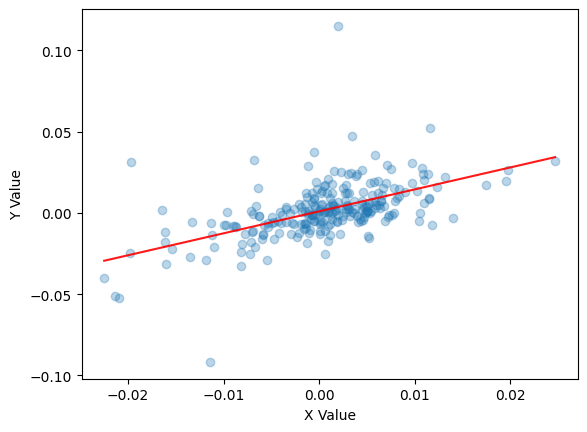

In [13]:
import yfinance as yf

# Fechas
start = '2014-01-01'
end = '2015-01-01'

# Definir tickers
aapl = yf.Ticker("AAPL")
lrcx = yf.Ticker("LRCX")
bench = yf.Ticker("SPY")

# Obtener precios de cierre diarios
bench_prices = bench.history(start=start, end=end, interval="1d")['Close']
a1_prices = lrcx.history(start=start, end=end, interval="1d")['Close']
a2_prices = aapl.history(start=start, end=end, interval="1d")['Close']

# Calcular retornos diarios
r_a1 = a1_prices.pct_change()[1:]
r_a2 = a2_prices.pct_change()[1:]
r_bench = bench_prices.pct_change()[1:]

# Regresión lineal (por ejemplo, de LRCX contra SPY)
linreg(r_bench.values, r_a1.values)

### Conocer Parámetros vs. Estimaciones

Es muy importante tener en cuenta que **todos los parámetros $\beta_0$ y $\beta_1$ estimados mediante regresión lineal son solo eso: estimaciones**.  

- Nunca puedes conocer los **parámetros verdaderos subyacentes** a menos que conozcas el proceso físico que genera los datos.  
- Los parámetros que estimas hoy pueden no ser los mismos si incluyes los datos de mañana, y los parámetros verdaderos subyacentes pueden estar cambiando.  

Por lo tanto, es muy importante, al realizar un análisis real, **prestar atención al error estándar de las estimaciones de los parámetros**.  
Más material sobre el **error estándar** se presentará en una clase posterior.  

Una manera de tener una idea de **qué tan estables son tus estimaciones de parámetros** es estimarlas usando una **ventana móvil de datos** y observar cuánta **varianza** hay en las estimaciones.

Veamos lo que ocurre si analizamos datos aleatorios:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.376
Date:                Mon, 15 Sep 2025   Prob (F-statistic):             0.0692
Time:                        20:56:52   Log-Likelihood:                -15.500
No. Observations:                 100   AIC:                             35.00
Df Residuals:                      98   BIC:                             40.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5756      0.061      9.439      0.000       0.455       0.697
x1            -0.1808      0.098     -1.837      0.069      -0.376       0.014
==============================================================================
Omnibus:                       24.775   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.360
Skew:                           0.030   Prob(JB):                       0.0686
Kurtosis:                       1.867   Cond. No.                         4.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

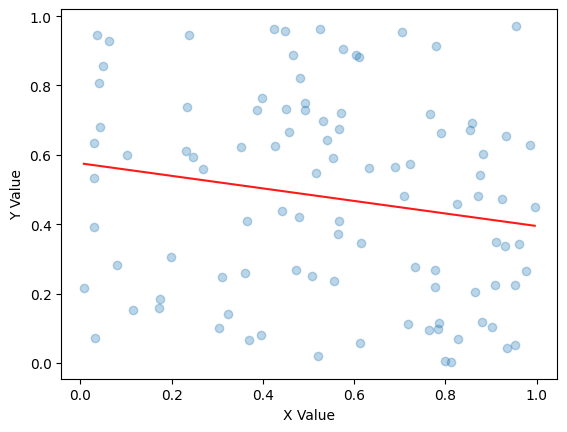

In [14]:
X = np.random.rand(100)
Y = np.random.rand(100)
linreg(X, Y)

## 3.2 — Análisis de residuos

### Residuales y error estadístico

Siempre que construimos un modelo, habrá **diferencias entre lo que predice el modelo y lo que se observa en la muestra**.  
Estas diferencias se conocen como los **residuales del modelo** y se pueden usar para verificar algunas de las **suposiciones básicas** que sustentan el modelo.  

#### Suposiciones clave a verificar:

1. **Ajuste lineal**: La relación subyacente debe ser lineal.  
2. **Homoscedasticidad**: Los datos no deben mostrar tendencia en la varianza.  
3. **Independientes e idénticamente distribuidos (i.i.d.)**: Los residuales de la regresión deben ser independientes e idénticamente distribuidos, sin signos de correlación serial.  

Podemos usar los residuales para diagnosticar si la relación que hemos estimado es **real o espuria**.  

---

#### Error estadístico

El **error estadístico** es una métrica similar asociada al análisis de regresión, con una diferencia importante:  

- Mientras que los **residuales** cuantifican la brecha entre las predicciones del modelo de regresión y la muestra observada,  
- El **error estadístico** es la diferencia entre el modelo de regresión y el **valor esperado no observable**.  

Usamos los residuales como un intento de **estimar este error**.


### Comprobación de supuestos mediante residuales

Muchas de las suposiciones necesarias para tener un **modelo de regresión lineal válido** pueden verificarse identificando patrones en los **residuales** de ese modelo.  

Podemos hacer una **verificación visual rápida** observando el **gráfico de residuales** de un modelo dado.  

En un gráfico de residuales, comparamos los **valores predichos del modelo** con los **residuales**.  
Lo que queremos ver es simplemente una **nube de puntos sin relación**.

### Heteroscedasticidad

Una de las suposiciones principales de la regresión lineal es que los datos subyacentes tienen **varianza constante**.  
Si algunas partes de los datos presentan una varianza diferente de otras, los datos **no son adecuados para una regresión lineal**.  

- La **heteroscedasticidad** se refiere a datos con **varianza no constante**.  
- En cambio, la **homoscedasticidad** ocurre cuando los datos tienen **varianza constante**.  

La heteroscedasticidad significativa **invalida los resultados de la regresión lineal** al sesgar el **error estándar del modelo**.  
Como resultado, no podemos confiar en los **tests de significancia** ni en los **intervalos de confianza** generados a partir del modelo y sus parámetros.  

Para evitar estas consecuencias, es importante usar **gráficos de residuales** para verificar la heteroscedasticidad y ajustar el modelo si es necesario.  

#### Ejemplo

Como ejemplo de **detección y corrección de heteroscedasticidad**, consideremos otra relación entre $X$ y $Y$:


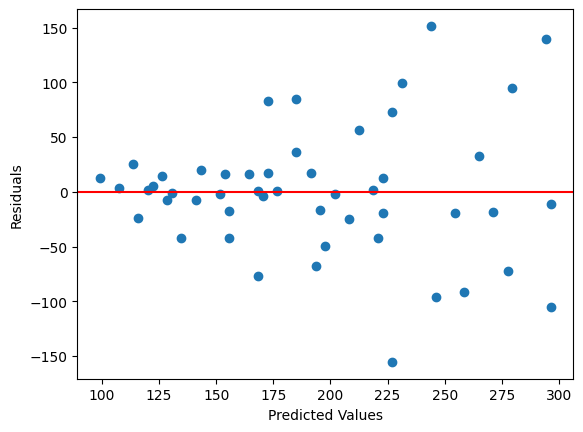

In [15]:
n = 50
X = np.random.randint(0, 100, n)
epsilon = np.random.normal(0, 1, n)
Y_heteroscedastic = 100 + 2*X + epsilon*X

model = sm.OLS(Y_heteroscedastic, sm.add_constant(X)).fit()
B0, B1 = model.params
residuals = model.resid

plt.scatter(model.predict(), residuals);
plt.axhline(0, color='red')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');

### Métodos estadísticos para detectar heteroscedasticidad

En general, queremos **respaldar las observaciones cualitativas** de un gráfico de residuales con un **método cuantitativo**.  
El gráfico de residuales nos llevó a pensar que los datos podrían ser heteroscedásticos.  
Vamos a **confirmar ese resultado con una prueba estadística**.  

Una forma común de probar la presencia de heteroscedasticidad es mediante la **prueba de hipótesis de Breusch-Pagan**.  
Es recomendable **combinar el análisis cualitativo** de un gráfico de residuales con el **análisis cuantitativo** de al menos una prueba de hipótesis.  

También se puede usar la **prueba de White**, pero por ahora utilizaremos únicamente Breusch-Pagan para probar la relación mencionada anteriormente.  
En el paquete `statsmodels` existe una función llamada `het_breuschpagan` que **simplifica el cálculo**.


### Residuales y Autocorrelación

Otra suposición detrás de las regresiones lineales es que los **residuales no estén autocorrelacionados**.  

- Una serie es **autocorrelacionada** cuando está correlacionada con una **versión retrasada de sí misma**.  
- Ejemplo de una serie potencialmente autocorrelacionada: **temperaturas máximas diarias**.  
  - La temperatura de hoy nos da información sobre la de mañana con cierta confianza (por ejemplo, si hoy hace 32 °C, es muy probable que mañana no esté bajo cero).  
- Ejemplo de serie **no autocorrelacionada**: **tiradas de un dado justo**. Cada tirada es independiente de la anterior.  

En finanzas:  
- Los **precios de las acciones** suelen ser autocorrelacionados.  
- Los **retornos de acciones** son generalmente independientes de un día a otro.  

Podemos representar la dependencia temporal respecto a valores previos así:

$$
X_t = f(X_{t-1}, X_{t-2}, \dots)
$$

Si los residuales de un modelo son autocorrelacionados, podrás hacer predicciones sobre **residuales adyacentes**.  
- En el caso de $X_t$, sabemos que los datos serán autocorrelacionados porque podemos predecir que los residuales adyacentes estarán cercanos entre sí.


Text(0, 0.5, 'Residuals')

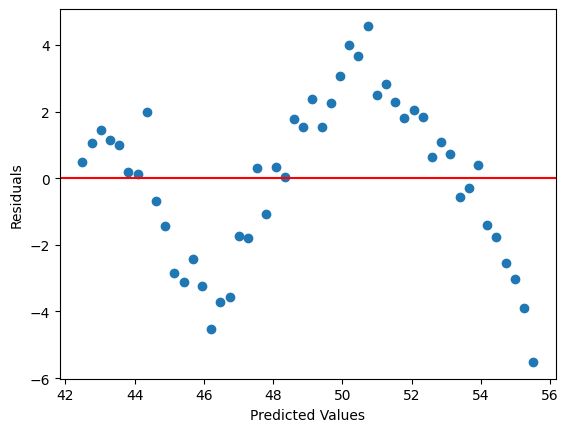

In [19]:
n = 50
X = np.linspace(0, n, n)
Y_autocorrelated = np.zeros(n)
Y_autocorrelated[0] = 50
for t in range(1, n):
    Y_autocorrelated[t] = Y_autocorrelated[t-1] + np.random.normal(0, 1) 

# Regressing X and Y_autocorrelated
model = sm.OLS(Y_autocorrelated, sm.add_constant(X)).fit()
B0, B1 = model.params
residuals = model.resid

plt.scatter(model.predict(), residuals)
plt.axhline(0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

## Ajuste por heteroscedasticidad o autocorrelación

#### Si, después de crear un gráfico de residuales y realizar pruebas, crees que tienes **heteroscedasticidad** o **autocorrelación**, existen varios métodos para intentar corregirla.  
- Para **autocorrelación**, uno de los métodos más comunes es la **diferenciación de la serie**.  
- Para **heteroscedasticidad**, además de la diferenciación, también se pueden usar modelos **GARCH**, que se explicarán en un modelo posterior.  

---

#### Análisis de diferencias

Un **análisis de diferencias** implica observar las **diferencias de primer orden** entre valores adyacentes.  
Con esto, analizamos los **cambios de un periodo a otro** de una variable independiente en lugar de mirar directamente sus valores.  

- Para autocorrelación: al observar las diferencias en lugar de los valores originales, podemos **eliminar la dependencia serial**.  
- Para heteroscedasticidad: la diferenciación puede ayudar, pero **los modelos GARCH** permitirán modelar explícitamente la varianza no constante.  
- Una vez corregido el problema, podemos usar el **modelo resultante sobre las diferencias** o sobre la varianza estimada.


In [20]:
Y_autocorrelated_diff = np.diff(Y_autocorrelated)

P-values:
 1     0.113347
2     0.036844
3     0.070734
4     0.047307
5     0.085995
6     0.012291
7     0.003810
8     0.004711
9     0.002434
10    0.002911
Name: lb_pvalue, dtype: float64 

The residuals are autocorrelated.


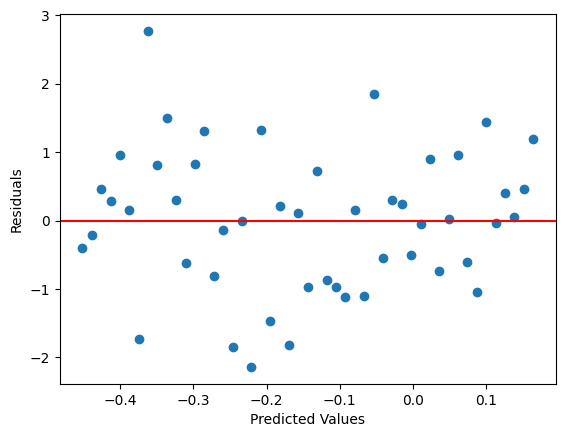

In [35]:

model = sm.OLS(Y_autocorrelated_diff, sm.add_constant(X[1:])).fit()
B0, B1 = model.params
residuals = model.resid

plt.scatter(model.predict(), residuals)
plt.axhline(0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Running and interpreting a Ljung-Box test
ljung_box = smd.acorr_ljungbox(residuals, lags=10, return_df=True)
print("P-values:\n", ljung_box['lb_pvalue'], "\n")

if any(ljung_box['lb_pvalue'] < 0.05):
    print ("The residuals are autocorrelated.")
else:
    print ("The residuals are not autocorrelated.")